In [ ]:
import h5py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fx = h5py.File('Data_Fuchs_v_0_lambda_um_0.8_points_100000_seed_0.h5', 'r')

In [ ]:
fx_dict = dict()
for i in fx.keys():
    fx_dict[i] = fx[i][:]

In [ ]:
fx.close()

In [ ]:
df = pd.DataFrame(fx_dict)

In [ ]:
df.head()

,Intensity_(W_cm2),Max_Proton_Energy_(MeV),Pulse_Duration_(fs),Spot_Size_(FWHM um),Target_Thickness (um)
0,4.430375e+19,26.342629,276.923395,7.890441,4.746512
1,1.398196e+20,23.447607,453.941239,1.454827,11.951370
2,6.431172e+19,22.036055,261.150353,9.977904,19.758459
3,4.311710e+19,0.180223,68.417606,1.609050,19.041907
4,1.866227e+19,4.596437,273.239350,2.885191,7.187944


In [ ]:
df = (df - df.mean())/df.std()

In [ ]:
df.head()

,Intensity_(W_cm2),Max_Proton_Energy_(MeV),Pulse_Duration_(fs),Spot_Size_(FWHM um),Target_Thickness (um)
0,-0.441922,-0.086202,0.114213,0.924298,-0.969908
1,-0.021070,-0.143620,1.391615,-1.550995,0.309527
2,-0.353765,-0.171616,0.000391,1.727187,1.695906
3,-0.447151,-0.605091,-1.390413,-1.491678,1.568661
4,-0.554901,-0.517503,0.087628,-1.000843,-0.536360


In [ ]:
cols = df.shape[1]

In [ ]:
X1 = df.iloc[:,0:cols-1]
Y1 = df.iloc[:, cols-1:cols]

In [ ]:
X1 = np.matrix(X1.values)
Y1 = np.matrix(Y1.values)

In [ ]:
theta = np.matrix(np.array([0,0,0,0]))

In [ ]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term  = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X1, Y1, theta)
        
    return theta, cost

In [ ]:
alpha = 0.01  
iters = 1000

In [ ]:
g, cost = gradientDescent(X1, Y1, theta, alpha, iters)

Text(0.5, 1.0, 'Error vs Training Epoch')

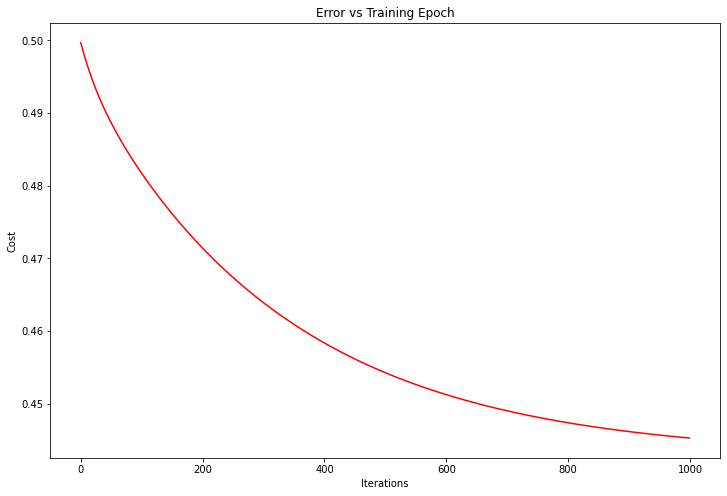

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')